# <b>Cars Engine Rating</b>

<h1> 1. Objectives and Problem Statement</h1>

<h2> 1. Problem Statement: </h2>
- Identify the engine rating based on the inspection parameters.<br>
- Engine rating basically states the condition of the engine. <br>
- We are tasked with predicting the rating given engine current condition.

<h2>1.2 Real world/Business Objectives and Constraints </h2>

1. Identify the engine rating based on the inspection parameters.
2. To find the outliers where rating has been given incorrectly.
3. Interpretability is quite important.

<h1> 2. Data Overview <h1>

<h2> 2.1 Importing necessary Libraries <h2>

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
# 1. Data Manipulation
import pandas as pd
import numpy as np

#2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#4. others
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2> 2.1 Reading data <h2>

In [5]:
# Get the current working directory
abspath = os.getcwd()

# Load the Excel file
df = pd.read_excel(os.path.join(abspath, 'cars_engine_data.xlsx'))

<h2> 2.2 Data Summary <h2>

In [6]:
print('='*70)
print('Columns/Features in the Dataset')
for index, column in enumerate(df.columns):
    print(index + 1, ": ", column)

print('='*70)
print('Total Data Points: ', df.shape[0])

print('='*70)
print('Sample Data: ')
df.sample(3)


Columns/Features in the Dataset
1 :  appointmentId
2 :  inspectionStartTime
3 :  year
4 :  month
5 :  engineTransmission_battery_value
6 :  engineTransmission_battery_cc_value_0
7 :  engineTransmission_battery_cc_value_1
8 :  engineTransmission_battery_cc_value_2
9 :  engineTransmission_battery_cc_value_3
10 :  engineTransmission_battery_cc_value_4
11 :  engineTransmission_engineoilLevelDipstick_value
12 :  engineTransmission_engineOilLevelDipstick_cc_value_0
13 :  engineTransmission_engineOil
14 :  engineTransmission_engineOil_cc_value_0
15 :  engineTransmission_engineOil_cc_value_1
16 :  engineTransmission_engineOil_cc_value_2
17 :  engineTransmission_engineOil_cc_value_3
18 :  engineTransmission_engineOil_cc_value_4
19 :  engineTransmission_engineOil_cc_value_5
20 :  engineTransmission_engineOil_cc_value_6
21 :  engineTransmission_engineOil_cc_value_7
22 :  engineTransmission_engineOil_cc_value_8
23 :  engineTransmission_engineOil_cc_value_9
24 :  engineTransmission_engine_value
25 

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
26017,aj_26018,2019-01-30 13:39:26,2011,9,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,67052,4.0
10067,aj_10068,2019-04-04 12:33:22,2009,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,30291,3.5
10625,aj_10626,2019-01-09 14:15:22,2010,6,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78798,3.5


<h1> 3. Mapping the real world problem to ML problem  <h1>

<h2> 3.1 Type of Machine Leaning Problem </h2>

<p> It is a Ordinal Regression problem, for a given features we need to predict what the engine rating will be based on condition. </p>

- y -> rating_engineTransmission {1,5}

<h2> 3.2 Train Test Split </h2>

1. We will do a Time based splitting of 80:20 or 70:30
2. As we have timestamps data this will help us to split the data (Time-based splitting)
3. This step we will perform here it self to avoid any data leakage

In [57]:
# We will seperate the data now itself to avoid any data leakage
df.sort_values(by = 'inspectionStartTime', inplace= True)

# Define the split point (e.g., 80% for training)
split_point = int(0.8 * len(df))

# Split into train and test sets
train = df[:split_point]
test = df[split_point:]

print("Train Shape", train.shape)
print("Test Shape", test.shape)

Train Shape (21045, 73)
Test Shape (5262, 73)


<h2> 3.3 Models to be used for predicting </h2>

1. Linear Regression 
2. Decision Tree Regressor

<h2> 3.4 Performance Metrics </h2>

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

Metric(s): 
* MSE (mean_sqaured_error)
* MSLE (mean_squared_log_error )
- Since the MSLE penalizes larger differences more severely, especially when predictions are overestimations.
- For instance, if the model predicts a 5 instead of a 2, MSLE will penalize this larger gap significantly.

<h1> 4. Exploratory Data Analysis <h1>

<h2> 4.1 Basic Stats </h2>

In [8]:
print('Data types:')
train.info()

Data types:
<class 'pandas.core.frame.DataFrame'>
Index: 21045 entries, 24658 to 5989
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              21045 non-null  object        
 1   inspectionStartTime                                        21045 non-null  datetime64[ns]
 2   year                                                       21045 non-null  int64         
 3   month                                                      21045 non-null  int64         
 4   engineTransmission_battery_value                           21045 non-null  object        
 5   engineTransmission_battery_cc_value_0                      2773 non-null   object        
 6   engineTransmission_battery_cc_value_1                      340 non-null    object        
 7   engineTransmission_ba

In [9]:
print("Total data points: ", train.shape[0])
print("Total features: ", train.shape[1])

Total data points:  21045
Total features:  73


<h3> 4.1.1 Checking Target Variable Distribution </h3>

In [10]:
train['rating_engineTransmission'].value_counts()

rating_engineTransmission
4.0    8068
3.5    4757
3.0    3588
4.5    1710
5.0    1292
1.0    1208
2.5     323
2.0      94
1.5       5
Name: count, dtype: int64

In [11]:
print('Total Datapoints: ', train.shape[0])
fig = px.bar(x = train['rating_engineTransmission'].value_counts().index
            , y = train['rating_engineTransmission'].value_counts().values
            , template= 'plotly_dark'
            , color= train['rating_engineTransmission'].value_counts().values
        )
fig.update_traces(text = np.round((train['rating_engineTransmission'].value_counts().values/ train.shape[0]) * 100, 2))
fig.update_layout(
        xaxis_title="Engine Transmission Rating"
        , yaxis_title="# Data Points"
        , coloraxis_showscale=False
)


Total Datapoints:  21045


<Axes: xlabel='rating_engineTransmission', ylabel='Density'>

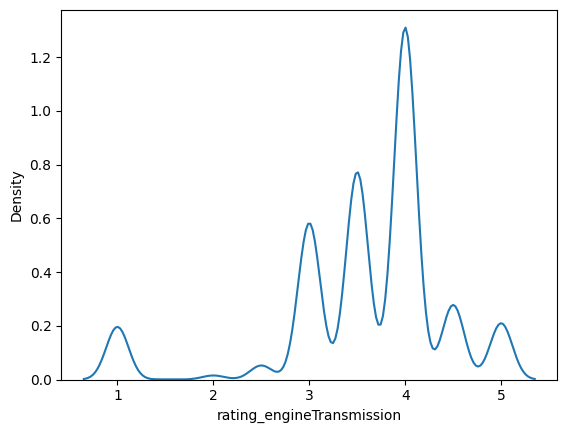

In [12]:
sns.kdeplot(x = train['rating_engineTransmission'], common_grid= True)

Observations:
1. In the training dataset we have total <b>21045</b> datapoints.
2. Most of the ratings lies between 3-4 which is contributing (78%).

<h3> 4.1.2 Catregorical Variable Analysis </h3>

Let's understand the dataset and their features.
1. inspectionStarttime - The start date and time of the engine inspection
2. year, month -> year and month of the car registered
<br>
<b> There are multiple features which depends upon their parent features</b>
And based on their parent features itself condition is mentioned. For instance if 'No' their child value may be helpful in explaining the exact condition.
<br>
3. battery_value 
4. engineoilLevelDipstick
5. engineoil
6. engine
7. coolant_value
8. engine_Mounting
9. engine_sound
10. exhaustSmoke
11. engineBlowByBackCompression
12. gearShifting
13. comments
14. fuel_type
15. odometer_rating
16. Rating -> dependent or Target Variable


Note:
- Model Sensitivity: Some models (e.g., decision trees, random forests) are more robust to missing values, whereas others (e.g., linear regression, SVMs) are sensitive and may require clean data.

In [58]:
# Segregating the categorical variavle
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
print("Categorical variables: ", len(categorical_cols))

Categorical variables:  66


<h4> 4.1.2.1 Parent Variables Analysis </h4>

In [15]:
# Lets deep dive in each and every Parent Columns and will handle the missing values of the child columns 

parent_cols = ['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
  'engineTransmission_engine_value',
    'engineTransmission_coolant_value',
    'engineTransmission_engineMounting_value',
    'engineTransmission_engineSound_value',
    'engineTransmission_exhaustSmoke_value',
    'engineTransmission_engineBlowByBackCompression_value',
    'engineTransmission_clutch_value',
    'engineTransmission_gearShifting_value']

Explanation:
- Unique Values: Displays the distinct values for each feature in a list.
- Percentage Distribution (%): Shows the percentage contribution of each unique value in the same order as the unique values list.
- This format gives a detailed breakdown of the distribution of values within a single row for each feature. This will help us to better understand the spread and significance of each unique value across the dataset.

In [16]:
# Function to create the tabular format with percentage distribution of each unique value
def unique_value_distribution_with_percentages(df):
    features = []
    unique_values = []
    unique_val_cnt = []
    percentage_distributions = []

    for col in parent_cols:
        # Get unique values and their respective counts
        value_counts = df[col].value_counts()
        total_count = len(df)
        
        # List of unique values and their percentages
        unique_vals = list(value_counts.index)
        n_unique = df[col].nunique()
        percentage = [round((count / total_count) * 100,0) for count in value_counts]
        
        features.append(col)
        unique_values.append(unique_vals)
        unique_val_cnt.append(n_unique)
        percentage_distributions.append(percentage)

    # Create DataFrame
    summary_df = pd.DataFrame({
        'Feature': features,
        'Unique Values': unique_values,
        'Unique Values count': unique_val_cnt,
        'Percentage Distribution (%)': percentage_distributions
    })
    
    return summary_df

# Call the function
summary = unique_value_distribution_with_percentages(train)
summary


,Feature,Unique Values,Unique Values count,Percentage Distribution (%)
0,engineTransmission_battery_value,"[Yes, No]",2,"[87.0, 13.0]"
1,engineTransmission_engineoilLevelDipstick_value,"[Yes, No]",2,"[99.0, 1.0]"
2,engineTransmission_engineOil,"[No, Yes]",2,"[71.0, 29.0]"
3,engineTransmission_engine_value,"[Yes, No]",2,"[66.0, 34.0]"
4,engineTransmission_coolant_value,"[Yes, No]",2,"[62.0, 38.0]"
5,engineTransmission_engineMounting_value,"[Yes, No]",2,"[65.0, 35.0]"
6,engineTransmission_engineSound_value,"[No, Yes]",2,"[71.0, 29.0]"
7,engineTransmission_exhaustSmoke_value,"[Yes, No]",2,"[79.0, 21.0]"
8,engineTransmission_engineBlowByBackCompression...,"[Yes, No]",2,"[94.0, 6.0]"
9,engineTransmission_clutch_value,"[Yes, No]",2,"[56.0, 44.0]"


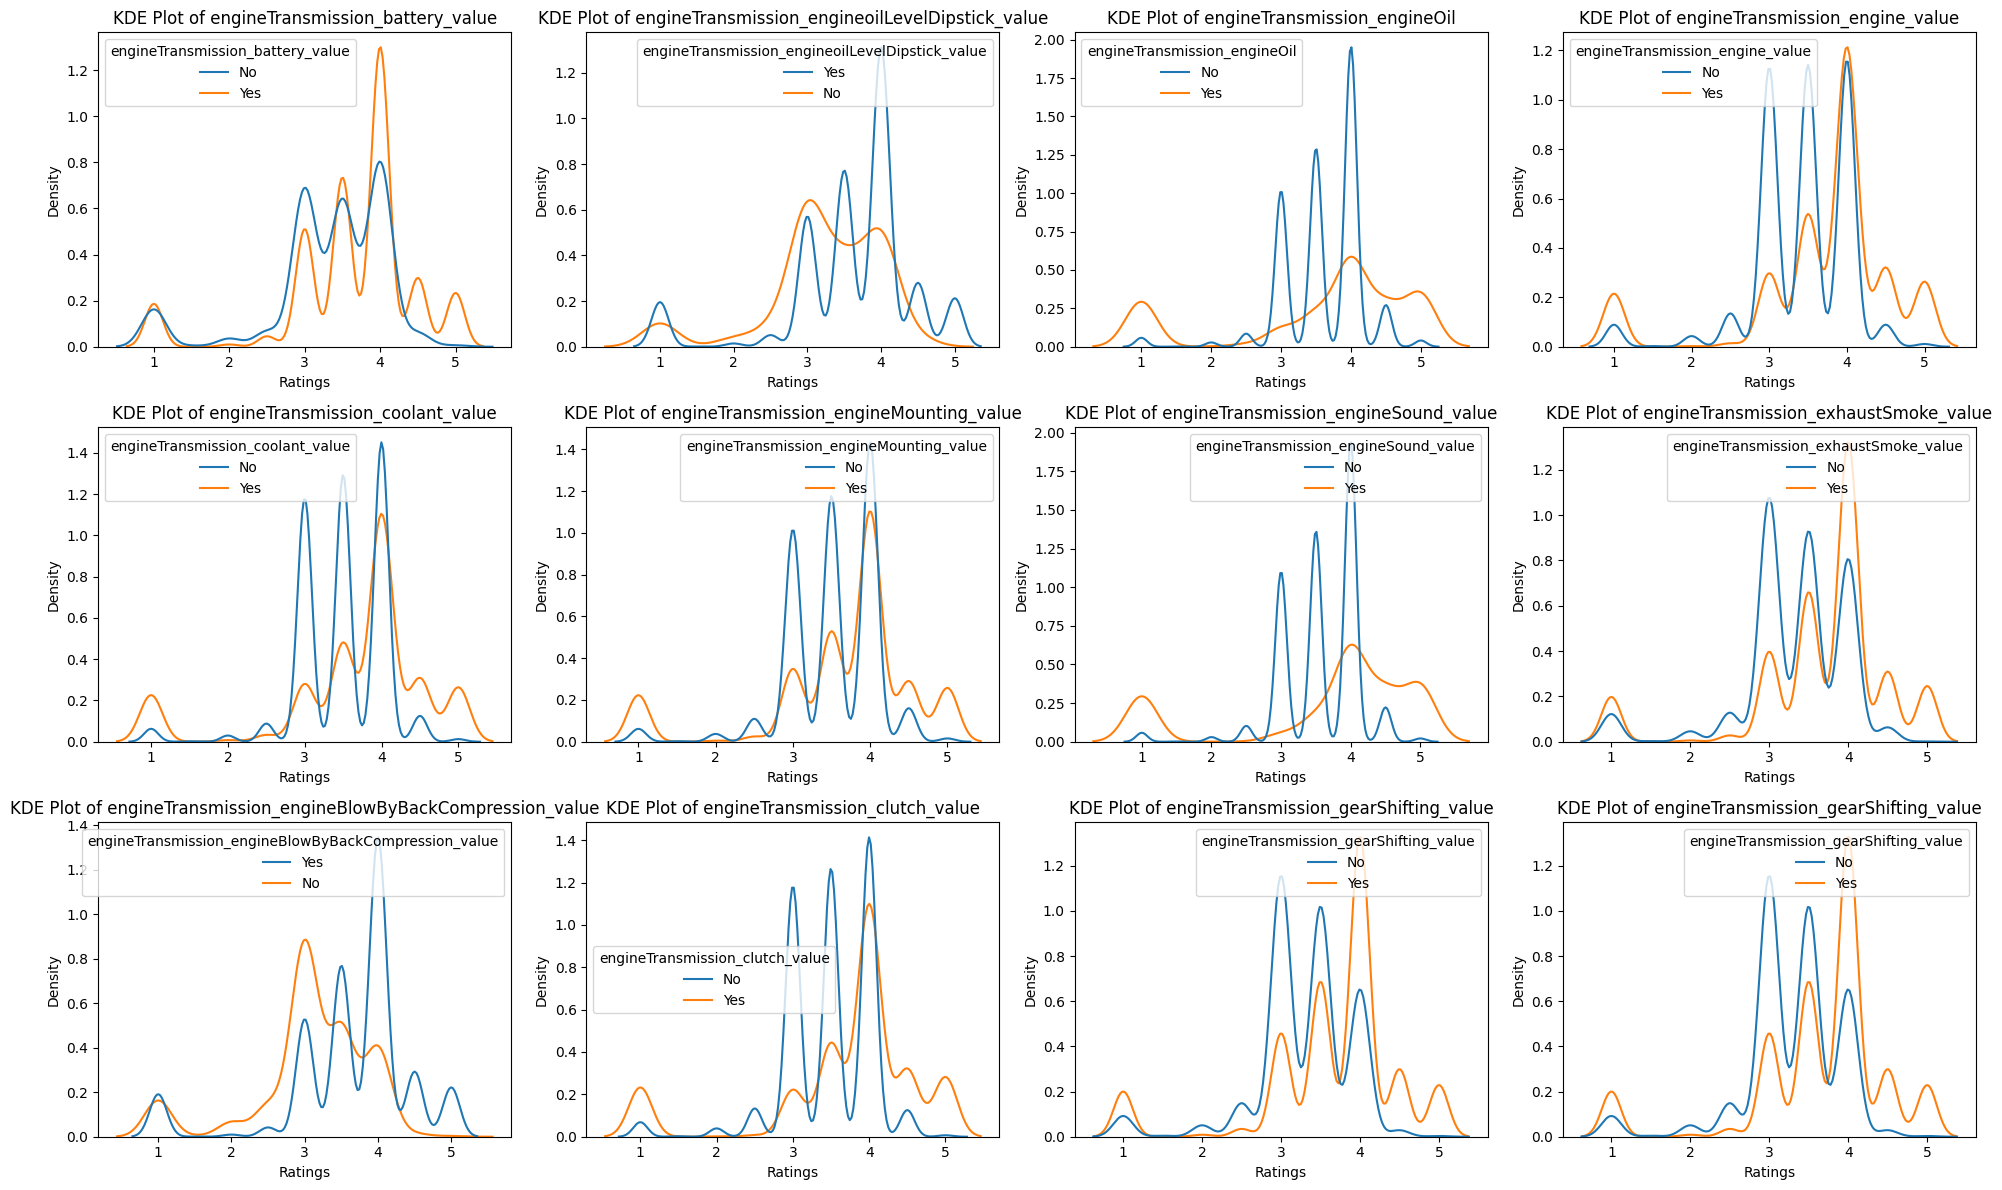

In [17]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 4, figsize=(20, 12))  # 3 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create KDE plots for the first 12 features in your DataFrame
for i, ax in enumerate(axes):
    if i < len(parent_cols):  # Check to avoid index error
        feature_name = parent_cols[i]

    sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = feature_name, ax=ax, common_norm = False)  # Drop NaN values
    ax.set_title(f'KDE Plot of {feature_name}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

<b>Observations:</b>

1. Battery Value (Graph-1)
* We have very few cases where battery value responses are "No"
* Even if the responses are "No" the ratings are distributed.
* But we have very few ratings after 4.5 when the responses are No

2. engineoilLevelDipstick (Graph-2)
* We have very few cases where Dipstick value responses are "No"
* Even if the responses are "No" the ratings are distributed.
* When the responses are "No" most of the ratings are between 3-4

3. Engine oil (Graph-3)
* This is looking like an inverse case where when the engine oil condition is "No" then we have very high rating.
* When "Yes" most of the rating are either 1 (or) 4,5.
* This can be an <b>outlier</b> case where even if the engine oil condition is okay but the rating is 1.

4. Engine (Graph-4)
* When "No" responses then the average is coming out to be 3.5
* When "Yes" responses we have very high pick at rating 4

5. Coolant (Graph-5)
* This feature is very very similar to Engine we can drop this column

6. Engine Mounting (Graph-6)
* This also have similar distribution to engine KDE hence we can keep any one

7. Engine Sound (Graph-7)
* We have more "No" responses than "yes"
* Here also we can observe that even the engine sound condition is okay we have rating which is 1 (Outlier Case)

8. Exhaust Smoke (Graph-8)
* When the responses are "Yes" the graph is more picker at 4

9. Blow by back compression (Graph-9)
* For "No" the graph is more picked at 3 and 1
* For "Yes" the graph has more values at 4

10. Clutch Value (Graph-10)
* It has the very similar distribution as Engine values lets drop it

11. Gear Shifting
* It has very similar distribution as Exhaust smoke.

In [18]:
parent_features_selection = ['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
  'engineTransmission_engine_value',
    'engineTransmission_exhaustSmoke_value',
    'engineTransmission_engineBlowByBackCompression_value']

<h4> 4.1.2.2 Child Variables Analysis </h4>

<h5> 1. Battery Value </h5>

In [19]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
battery_columns = train.filter(regex='battery|rating').columns

# we already know that we will have null values when the condition is yes
print(train[battery_columns][train['engineTransmission_battery_value'] == 'No'].info())

# battery_df = train[battery_columns][train['engineTransmission_battery_value'] == 'No'].fillna('No issues')

<class 'pandas.core.frame.DataFrame'>
Index: 2773 entries, 24658 to 2359
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   engineTransmission_battery_value       2773 non-null   object 
 1   engineTransmission_battery_cc_value_0  2773 non-null   object 
 2   engineTransmission_battery_cc_value_1  340 non-null    object 
 3   engineTransmission_battery_cc_value_2  57 non-null     object 
 4   engineTransmission_battery_cc_value_3  8 non-null      object 
 5   engineTransmission_battery_cc_value_4  1 non-null      object 
 6   rating_engineTransmission              2773 non-null   float64
dtypes: float64(1), object(6)
memory usage: 173.3+ KB
None


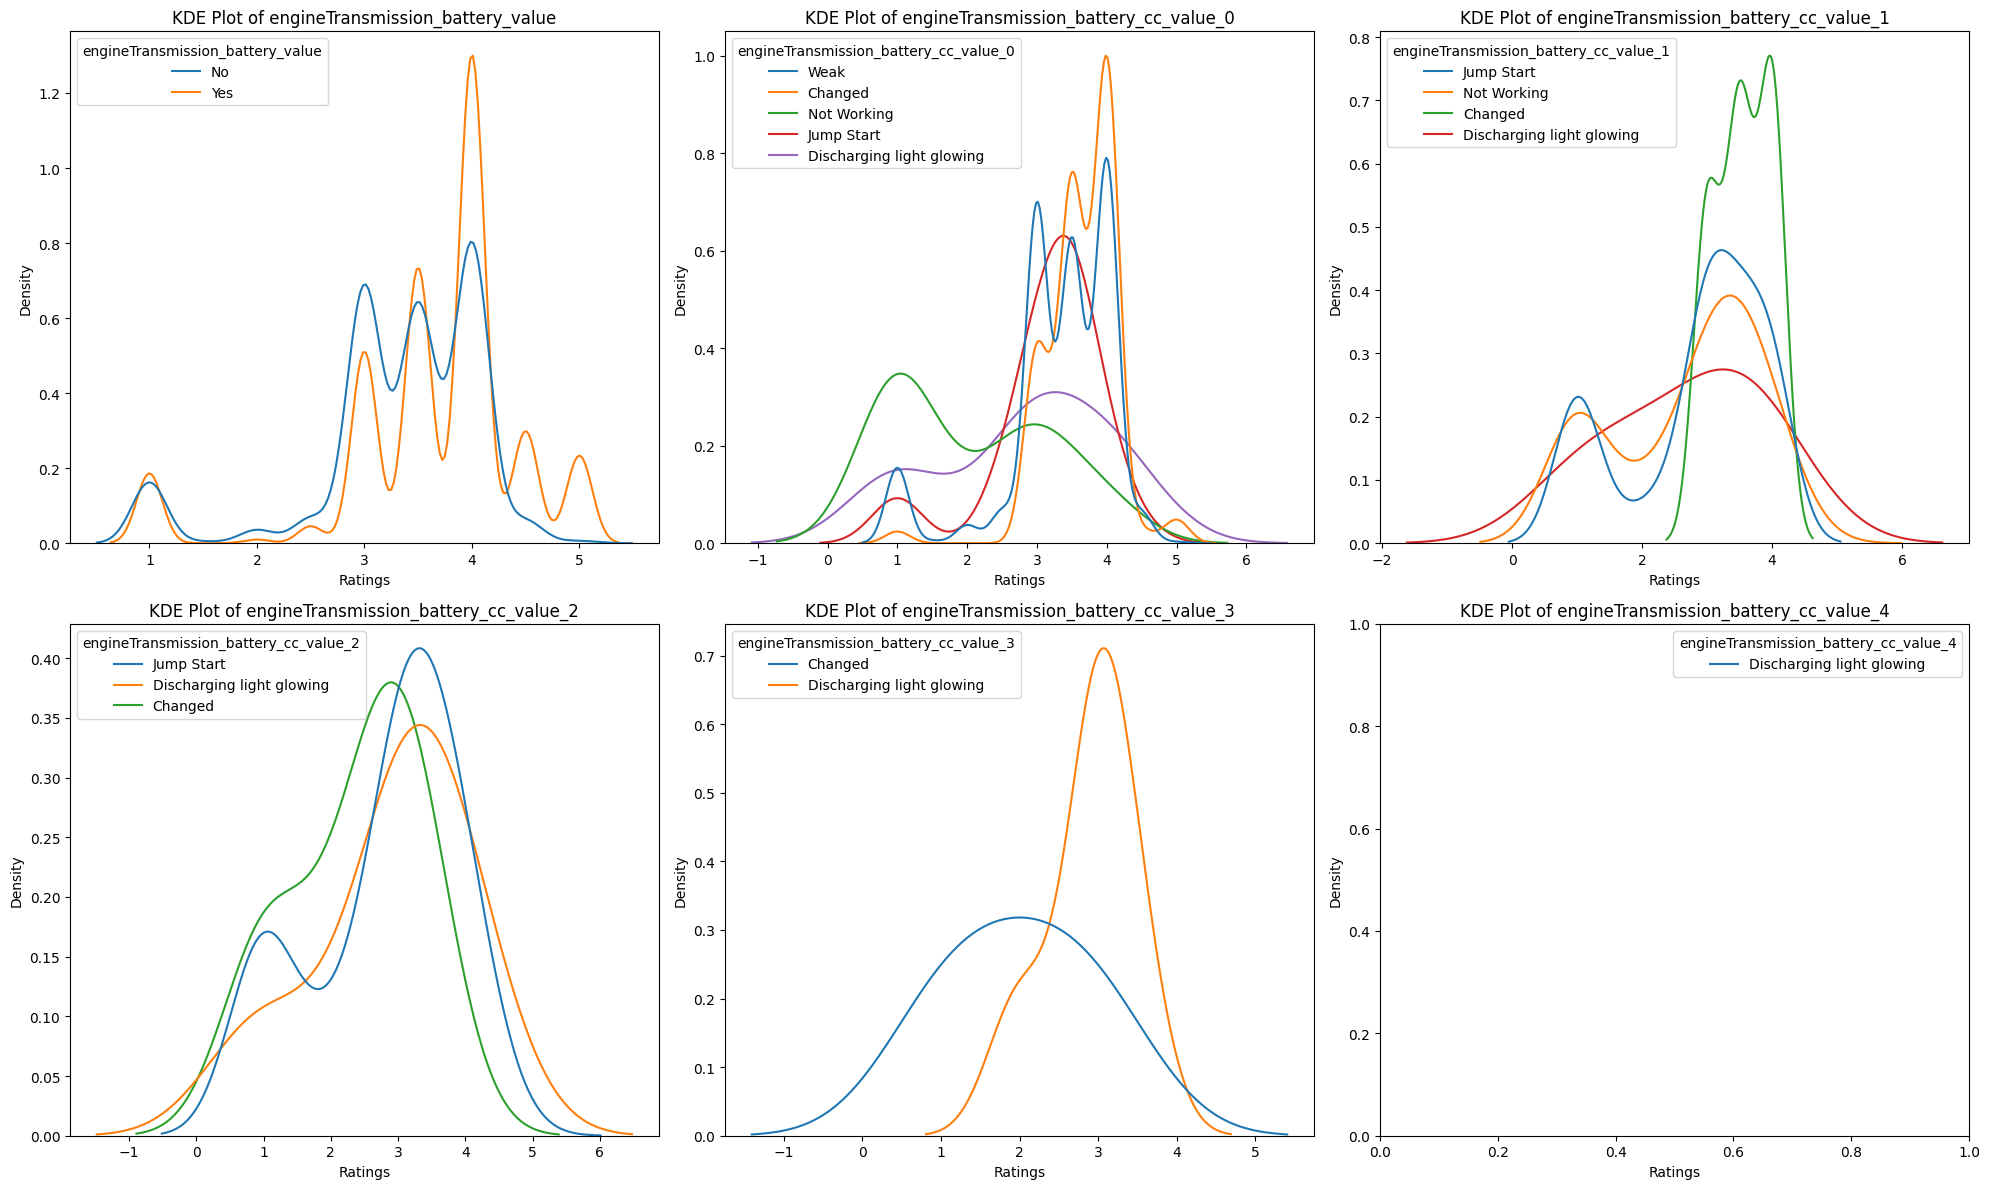

In [20]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 3 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create KDE plots for the first 12 features in your DataFrame
for i, ax in enumerate(axes):
    if i < len(battery_columns):  # Check to avoid index error
        feature_name = battery_columns[i]

    sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = feature_name, ax=ax, common_norm = False)  # Drop NaN values
    ax.set_title(f'KDE Plot of {feature_name}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observations:
* Its look like we have some information in the Graph-2, and Graph-3 
and we will drop rest of them 
* We will fill Nan values with 'No Issues'

<h5> 2. engineTransmission_engineoilLevelDipstick_value </h5>

In [22]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
engineoilLevelDipstick = train.filter(regex='LevelDipstic|rating').columns

# we already know that we will have null values when the condition is yes
print(train[engineoilLevelDipstick][train['engineTransmission_engineoilLevelDipstick_value'] == 'No'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 4694 to 11045
Data columns (total 3 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   engineTransmission_engineoilLevelDipstick_value       315 non-null    object 
 1   engineTransmission_engineOilLevelDipstick_cc_value_0  315 non-null    object 
 2   rating_engineTransmission                             315 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.8+ KB
None


<Axes: xlabel='rating_engineTransmission', ylabel='Density'>

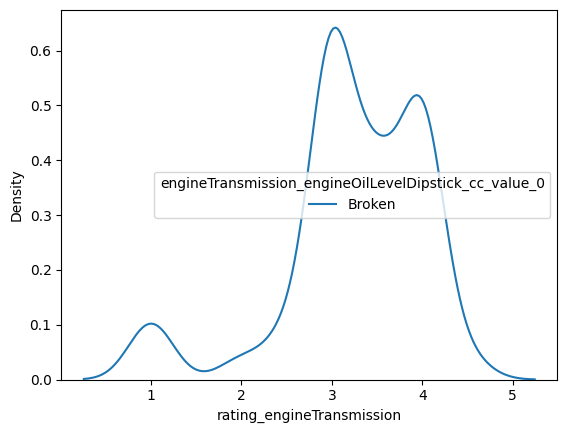

In [23]:
sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = 'engineTransmission_engineOilLevelDipstick_cc_value_0',  common_norm = False)  # Drop NaN values

Observations:
* We have single value for this column this feature is not important

<h5> 3. engineTransmission_engineOil </h5>

In [24]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
engineOil = train.filter(regex='engineOil|rating').columns[1:8]

# we already know that we will have null values when the condition is yes
print(train[engineOil][train['engineTransmission_engineOil'] == 'No'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 14952 entries, 24658 to 5989
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   engineTransmission_engineOil             14952 non-null  object
 1   engineTransmission_engineOil_cc_value_0  14952 non-null  object
 2   engineTransmission_engineOil_cc_value_1  8854 non-null   object
 3   engineTransmission_engineOil_cc_value_2  5281 non-null   object
 4   engineTransmission_engineOil_cc_value_3  2989 non-null   object
 5   engineTransmission_engineOil_cc_value_4  1406 non-null   object
 6   engineTransmission_engineOil_cc_value_5  469 non-null    object
dtypes: object(7)
memory usage: 934.5+ KB
None


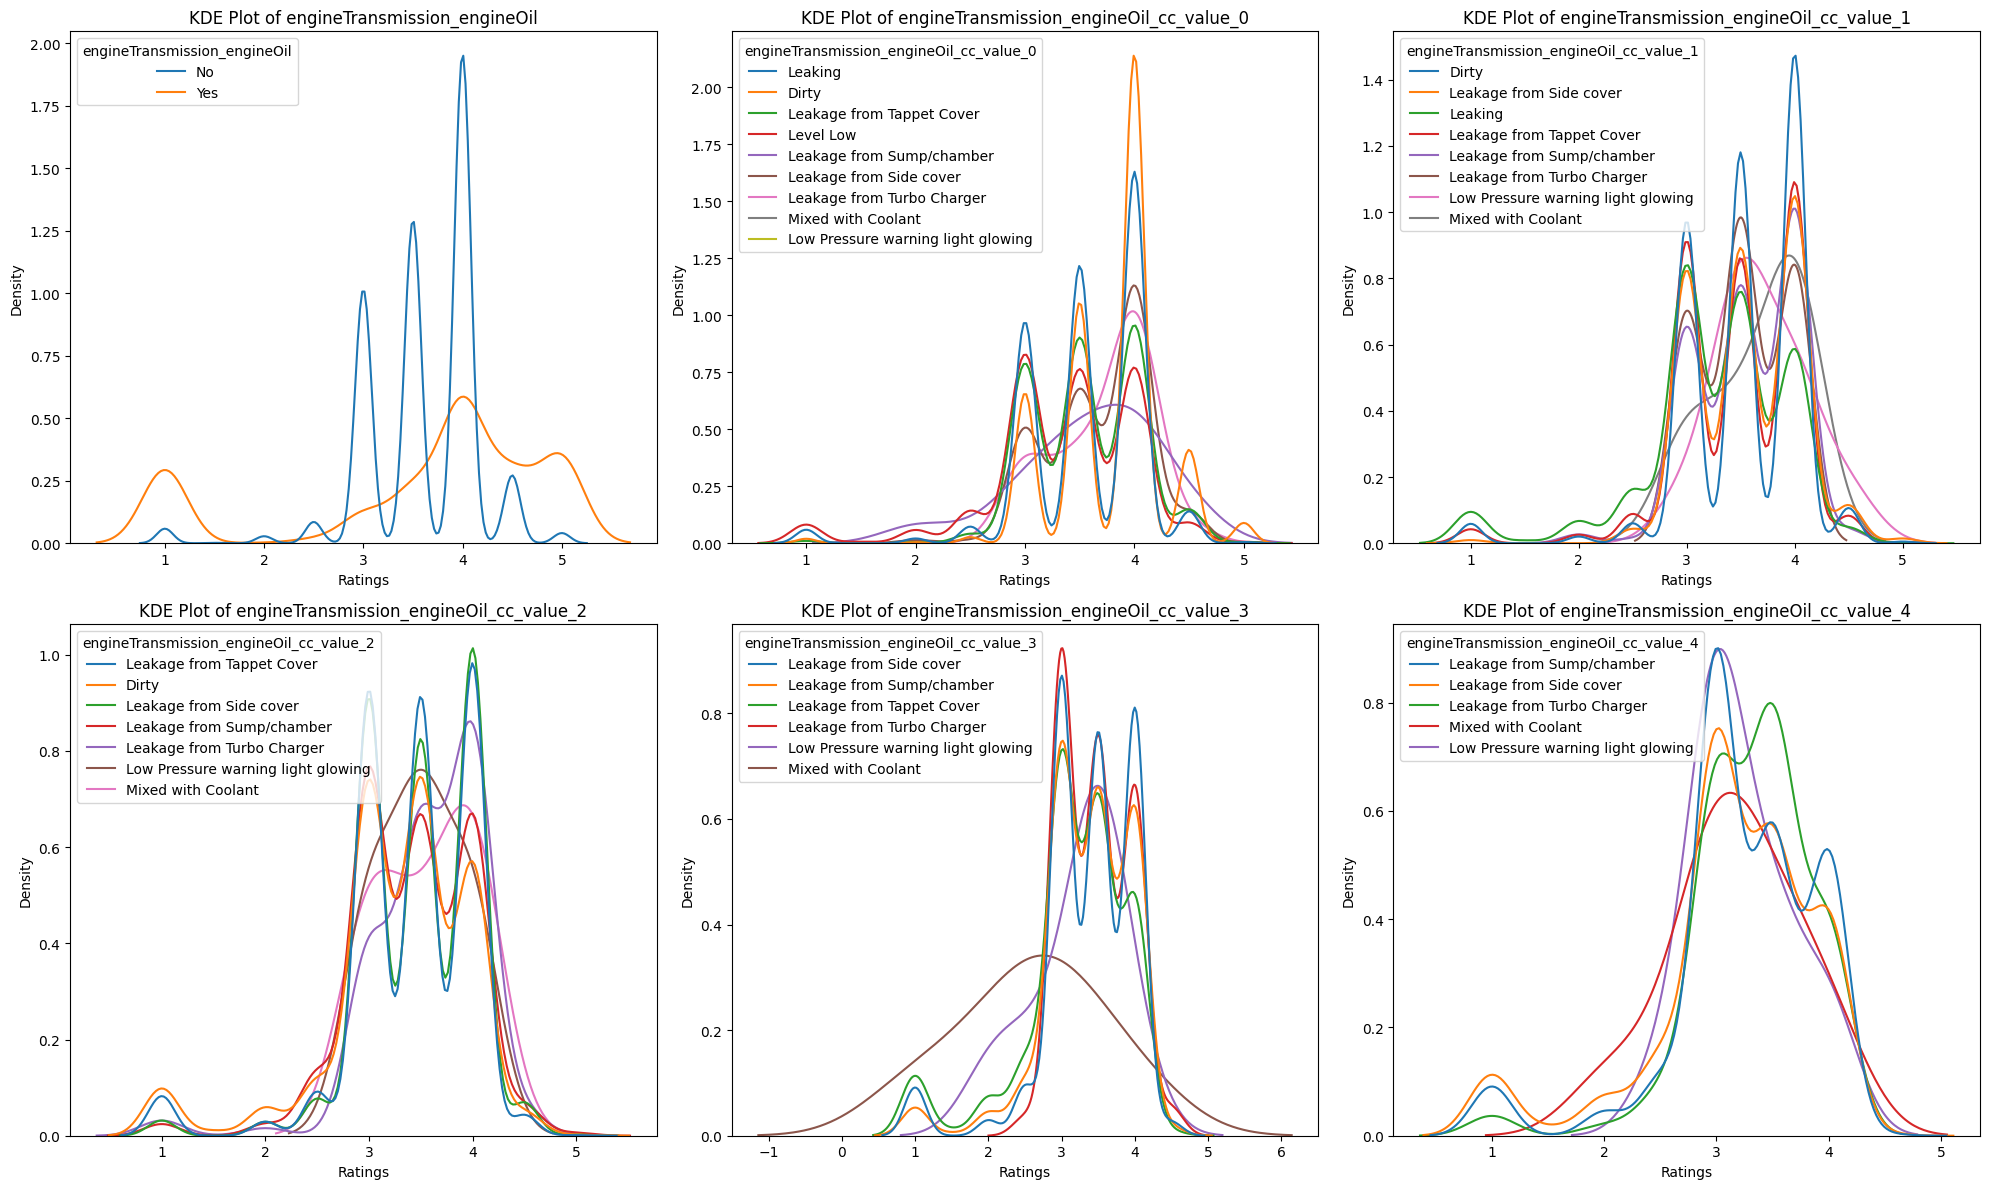

In [25]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 3 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create KDE plots for the first 12 features in your DataFrame
for i, ax in enumerate(axes):
    if i < len(engineOil):  # Check to avoid index error
        feature_name = engineOil[i]

    sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = feature_name, ax=ax, common_norm = False)  # Drop NaN values
    ax.set_title(f'KDE Plot of {feature_name}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observations:
* Let's Keep the engineTransmission_engineOil_cc_value_0 as for some of the class like dirty has high peak at rating 4.
* Yes there is an overlapping which is difficult to find out the information

<h5> 4. engineTransmission_engine_value </h5>

In [27]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
engine_val = train.filter(regex='engineTransmission_engine_value|engineTransmission_engine_cc|rating').columns[:8]

# we already know that we will have null values when the condition is yes
print(train[engine_val][train['engineTransmission_engine_value'] == 'No'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 7244 entries, 24658 to 2359
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   engineTransmission_engine_value       7244 non-null   object
 1   engineTransmission_engine_cc_value_0  7244 non-null   object
 2   engineTransmission_engine_cc_value_1  4051 non-null   object
 3   engineTransmission_engine_cc_value_2  1874 non-null   object
 4   engineTransmission_engine_cc_value_3  722 non-null    object
 5   engineTransmission_engine_cc_value_4  240 non-null    object
 6   engineTransmission_engine_cc_value_5  76 non-null     object
 7   engineTransmission_engine_cc_value_6  31 non-null     object
dtypes: object(8)
memory usage: 509.3+ KB
None


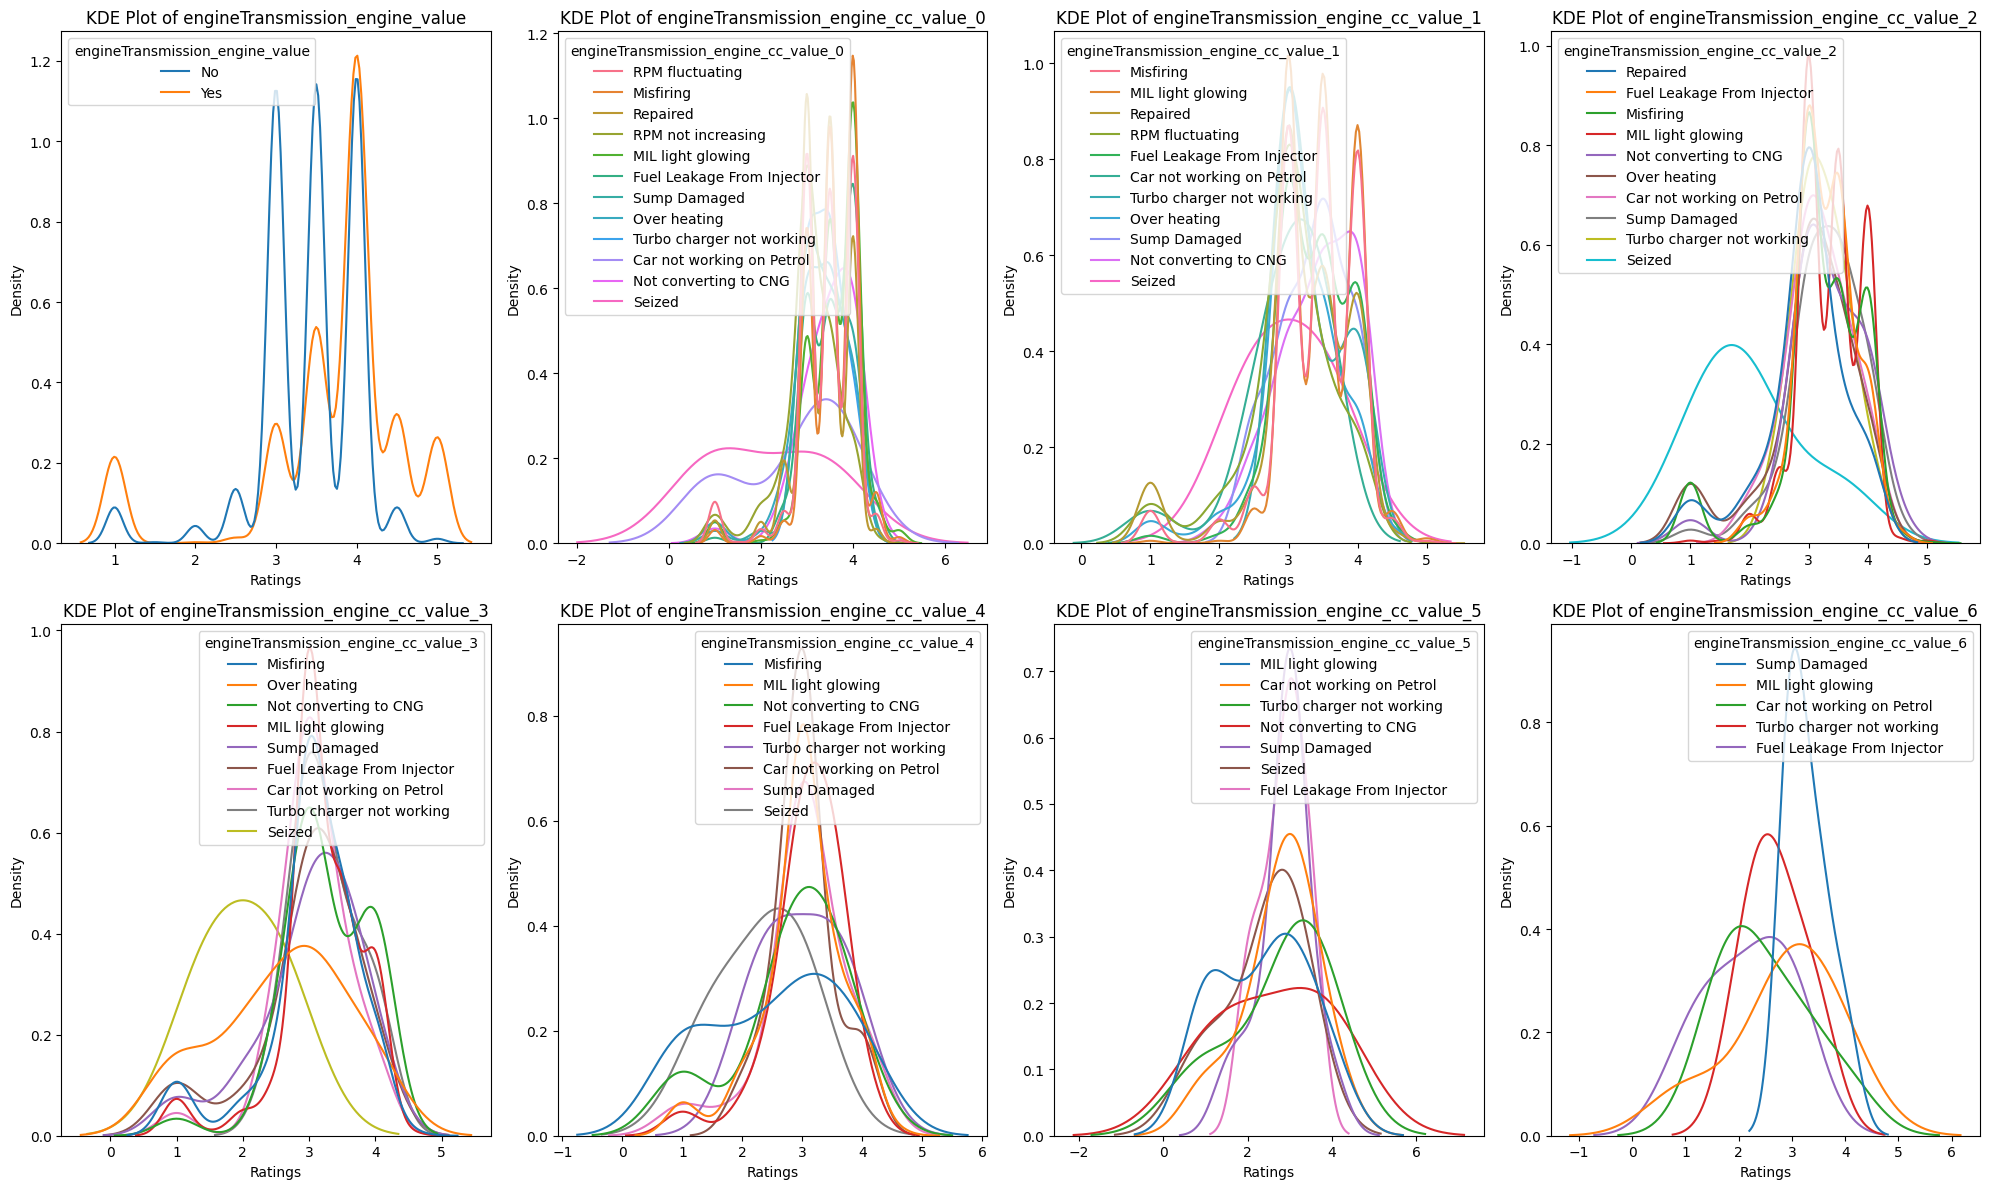

In [28]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 4, figsize=(20, 12))  # 3 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create KDE plots for the first 12 features in your DataFrame
for i, ax in enumerate(axes):
    if i < len(engine_val):  # Check to avoid index error
        feature_name = engine_val[i]

    sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = feature_name, ax=ax, common_norm = False)  # Drop NaN values
    ax.set_title(f'KDE Plot of {feature_name}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observations:
* Let's Select Graph-1, Graph-3 and Graph-4

<h5>5. engineTransmission_exhaustSmoke_value</h5>

In [30]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
exhaustSmoke = train.filter(regex='exhaustSmoke|rating').columns

# we already know that we will have null values when the condition is yes
print(train[exhaustSmoke][train['engineTransmission_exhaustSmoke_value'] == 'No'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 24658 to 12579
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   engineTransmission_exhaustSmoke_value       4424 non-null   object 
 1   engineTransmission_exhaustSmoke_cc_value_0  4424 non-null   object 
 2   rating_engineTransmission                   4424 non-null   float64
dtypes: float64(1), object(2)
memory usage: 138.2+ KB
None


<Axes: xlabel='rating_engineTransmission', ylabel='Density'>

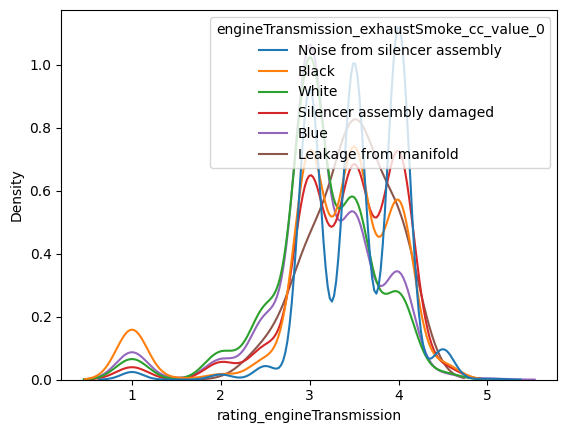

In [31]:
sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = 'engineTransmission_exhaustSmoke_cc_value_0',  common_norm = False)  # Drop NaN values

Observation:
* There is not much seperation but might be helpful in distinguising

<h5>6. engineTransmission_engineBlowByBackCompression_value</h5>

In [33]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
blowByBackCompression = train.filter(regex='BlowByBackCompression|rating').columns

# we already know that we will have null values when the condition is yes
print(train[blowByBackCompression][train['engineTransmission_engineBlowByBackCompression_value'] == 'No'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 4519 to 8207
Data columns (total 3 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   engineTransmission_engineBlowByBackCompression_value       1253 non-null   object 
 1   engineTransmission_engineBlowByBackCompression_cc_value_0  1253 non-null   object 
 2   rating_engineTransmission                                  1253 non-null   float64
dtypes: float64(1), object(2)
memory usage: 39.2+ KB
None


<Axes: xlabel='rating_engineTransmission', ylabel='Density'>

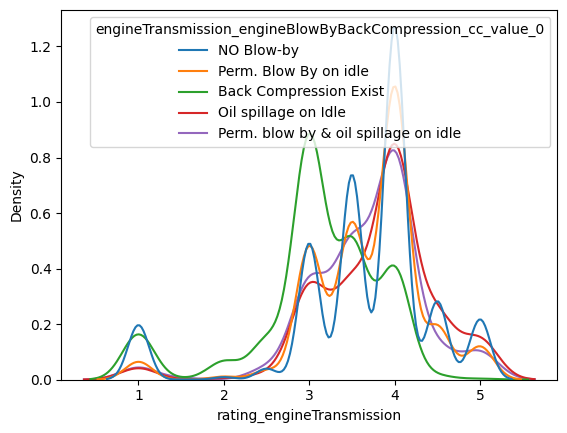

In [34]:
sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = 'engineTransmission_engineBlowByBackCompression_cc_value_0',  common_norm = False)  # Drop NaN values

Observation:
* There is not much seperation but might be helpful in distinguising

In [35]:
# Lets select child features and store in the list
child_feature_selection = ['engineTransmission_battery_cc_value_0',
     'engineTransmission_battery_cc_value_1',
        'engineTransmission_engineOil_cc_value_0',
        'engineTransmission_engine_cc_value_0',
        'engineTransmission_engine_cc_value_2',
        'engineTransmission_engine_cc_value_3',
        'engineTransmission_exhaustSmoke_cc_value_0',
        'engineTransmission_engineBlowByBackCompression_cc_value_0']

<h4> 4.1.2.3 Fuel Type and Comments Feature Analysis </h4>

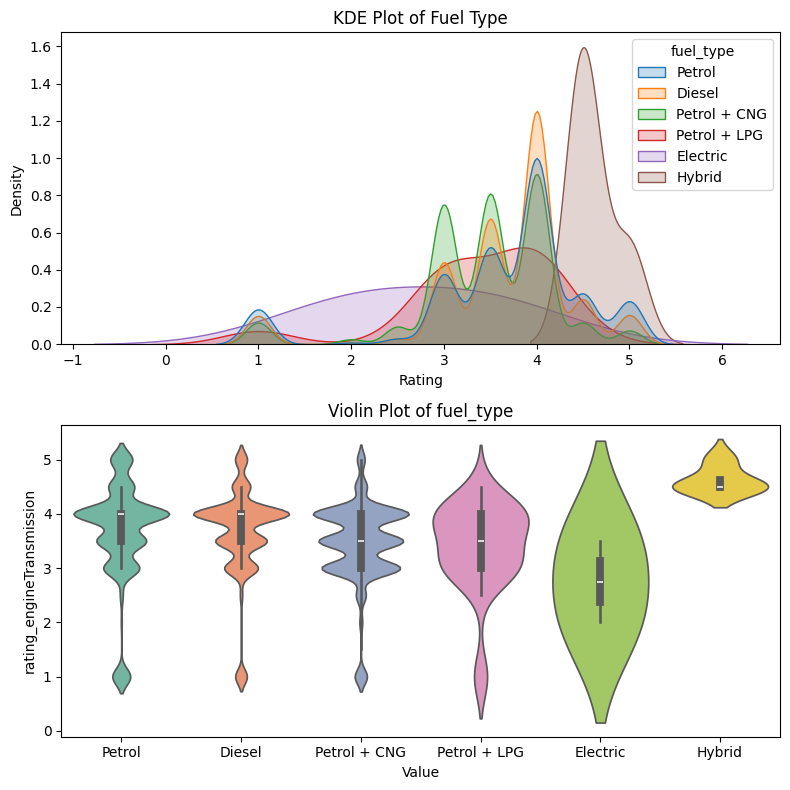

In [36]:
# Deep Diving into the binary categorical variables
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# KDE Plot in the first row
sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = 'fuel_type',  common_norm = False, ax=axes[0], fill=True)  # Drop NaN values
axes[0].set_title(f'KDE Plot of Fuel Type')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Density')

# Violin Plot in the second row
sns.violinplot(x = 'fuel_type', y = 'rating_engineTransmission', data = train, palette='Set2', ax=axes[1])
axes[1].set_title(f'Violin Plot of fuel_type')
axes[1].set_xlabel('Value')

# Adjust layout for better spacing
plt.tight_layout()

# Show each plot as you loop through the features
plt.show()

<b>Observations</b>:
1. The Hybrid fuel type has all the values between 4-5 (This can be because of the new model car)
2. Petrol and Diesel has almost same distributions
3. Electric vehicle's graph is symmetric

<h3> Comments columns</h3>

In [38]:
# Now Let's Deep Dive into the child Features of the feature we have selected and check the null values
comments = train.filter(regex='comments|rating').columns

# we already know that we will have null values when the condition is yes
print(train[comments].info())

<class 'pandas.core.frame.DataFrame'>
Index: 21045 entries, 24658 to 5989
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   engineTransmission_comments_value_0  3223 non-null   object 
 1   engineTransmission_comments_value_1  1030 non-null   object 
 2   engineTransmission_comments_value_2  316 non-null    object 
 3   engineTransmission_comments_value_3  45 non-null     object 
 4   engineTransmission_comments_value_4  11 non-null     object 
 5   rating_engineTransmission            21045 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.6+ MB
None


In [39]:
# Let's see if the comments are type of review column or just repeated sets
train['engineTransmission_comments_value_0'].value_counts()

engineTransmission_comments_value_0
Pickup Low                                       1717
Electrical wiring Damaged                         691
Starter Motor / Solenoid malfunctioning           687
Car not in running condition, towing required      97
Radiator Fan not working                           27
4WD / AWD not working                               4
Name: count, dtype: int64

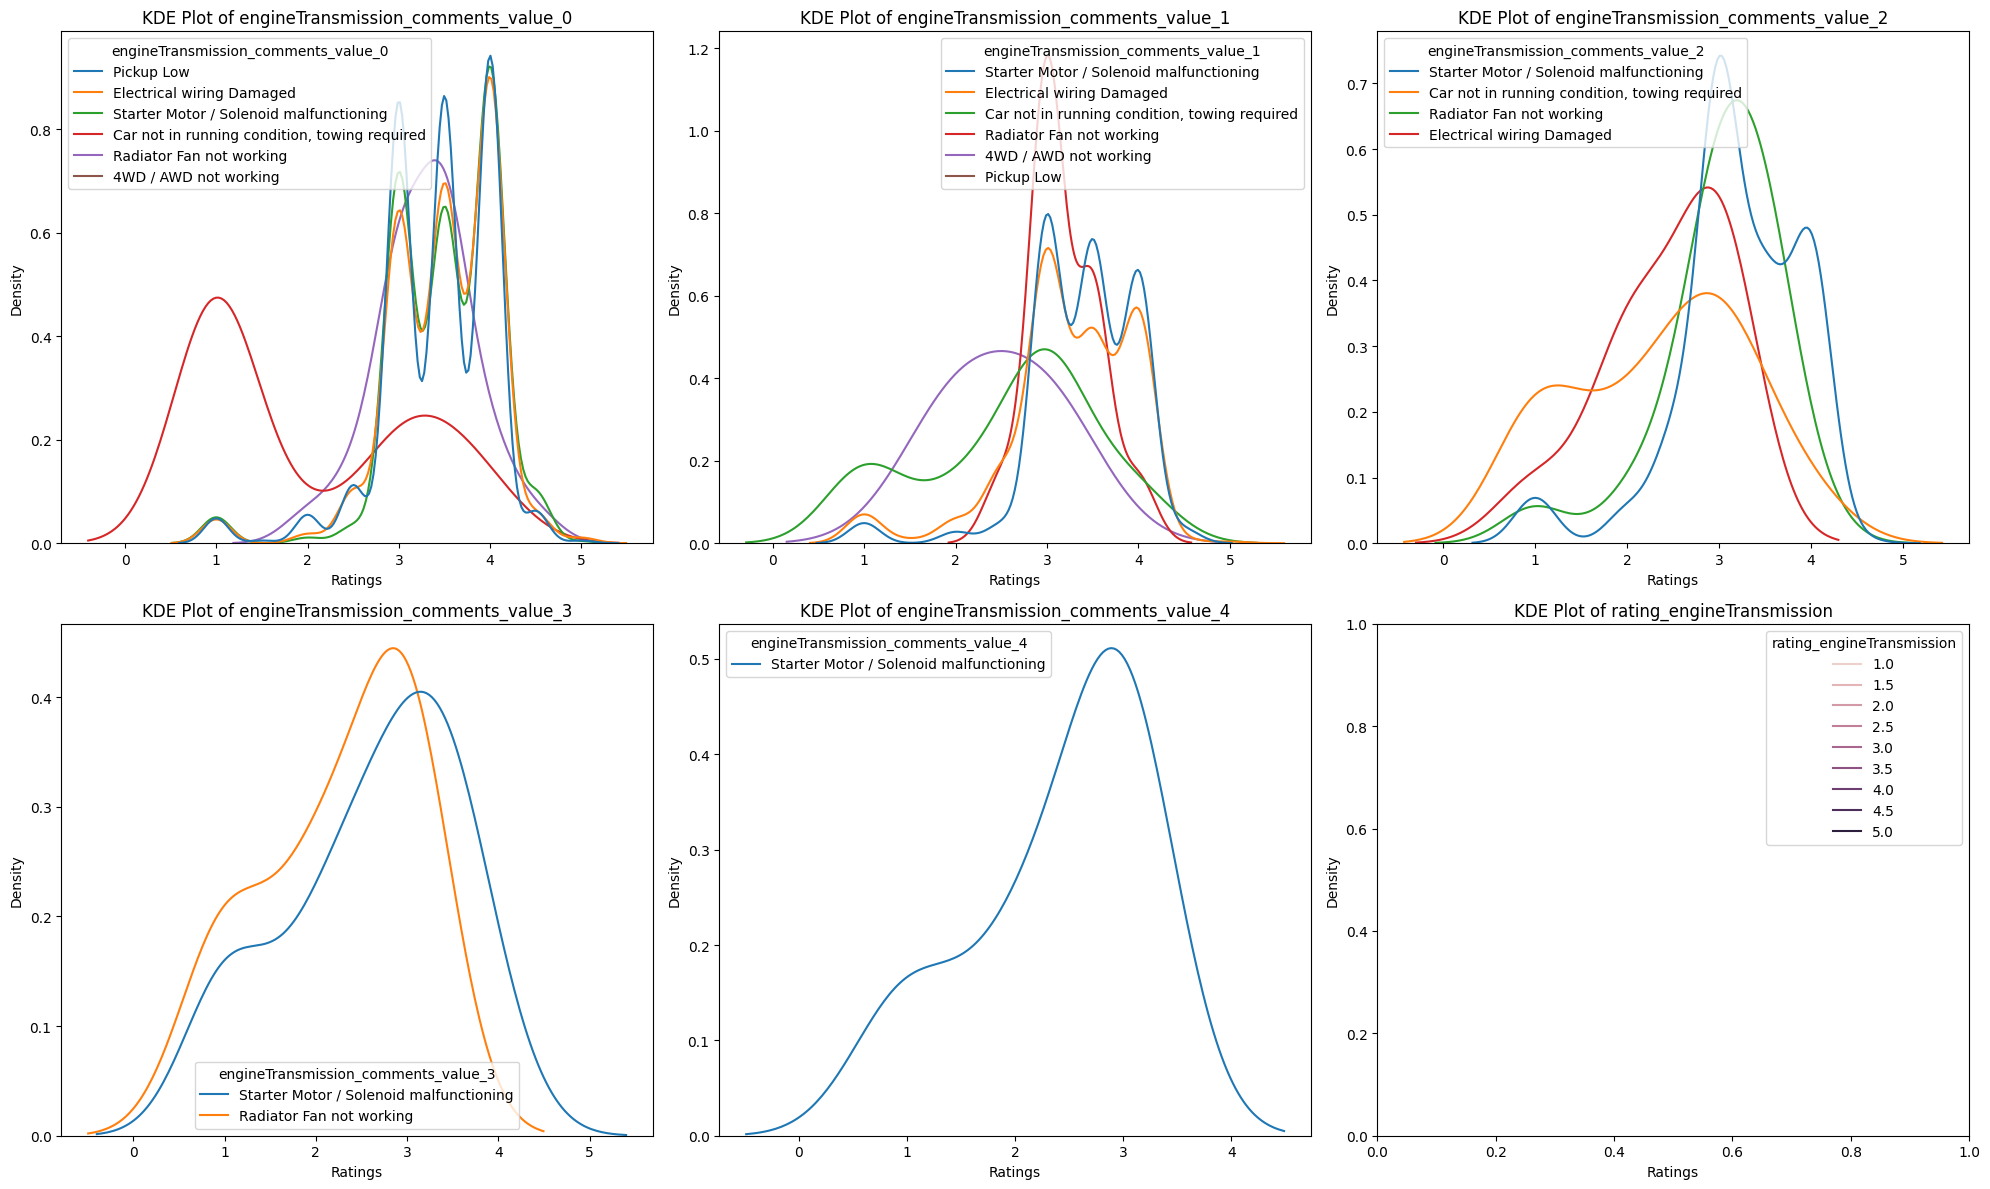

In [40]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 3 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create KDE plots for the first 12 features in your DataFrame
for i, ax in enumerate(axes):
    if i < len(comments):  # Check to avoid index error
        feature_name = comments[i]

    sns.kdeplot(data = train, x = 'rating_engineTransmission', 
        hue = feature_name, ax=ax, common_norm = False)  # Drop NaN values
    ax.set_title(f'KDE Plot of {feature_name}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observation:
1. There is some distinction while looking at the Graph-1 and Graph-2

In [41]:
# Feature Selection
other_features_selection = ['fuel_type',
 'engineTransmission_comments_value_0',
  'engineTransmission_comments_value_1']

<h3> 4.1.3 Non-Catregorical Variable Analysis </h3>

In [42]:
non_categorical_cols = [x for x in train.columns if x not in categorical_cols]

In [43]:
train[non_categorical_cols].dtypes

inspectionStartTime                        datetime64[ns]
year                                                int64
month                                               int64
engineTransmission_engineOil_cc_value_9           float64
engineTransmission_engine_cc_value_10             float64
odometer_reading                                    int64
rating_engineTransmission                         float64
dtype: object

<h5> 1. Odometer Reading </h5>

<Axes: xlabel='odometer_reading', ylabel='rating_engineTransmission'>

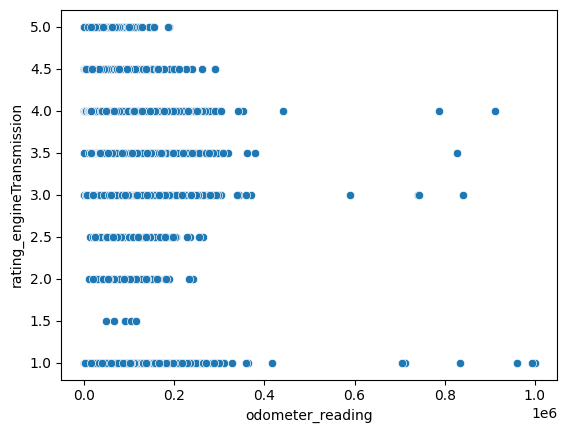

In [45]:
sns.scatterplot(x = 'odometer_reading', y = 'rating_engineTransmission', data=train)

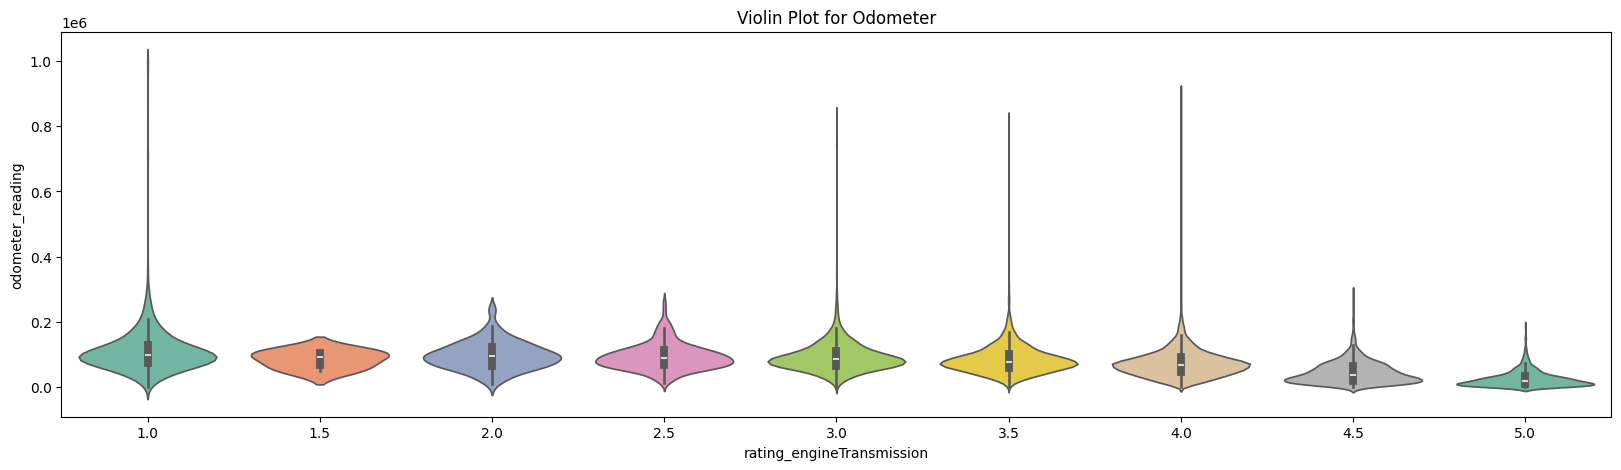

In [46]:
# Lets deep dive odmoeter reading
plt.figure(figsize=(20, 5))
sns.violinplot(x = 'rating_engineTransmission', y = 'odometer_reading', data = train, palette='Set2')
plt.title(f"Violin Plot for Odometer")
plt.show()

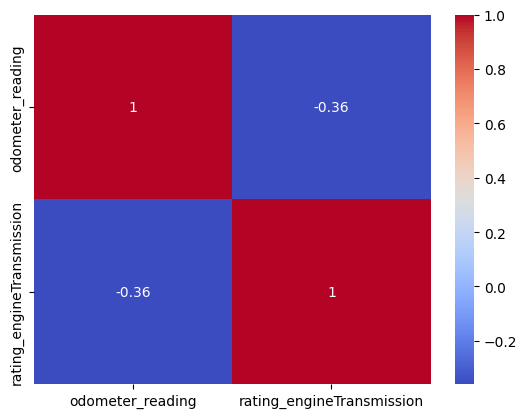

In [47]:
correlation_matrix = train[['odometer_reading', 'rating_engineTransmission']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

<b>Observations</b>:
1. The peak of the feature with respect non-duplicate pairs is at the value 0
2. There is some overlapping for both the classes but the dense decreases when the value is more than 0.3. Even the Corelation score is very low


<h5> 2. Year </h5>

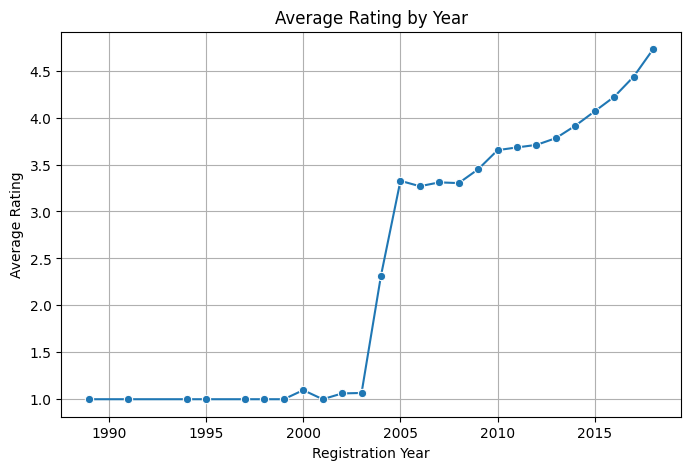

In [48]:
# Lets deep dive year features reading

# Group by year and calculate mean rating
yearly_ratings = train.groupby('year')['rating_engineTransmission'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='rating_engineTransmission', data=yearly_ratings, marker='o')

plt.title('Average Rating by Year')
plt.xlabel('Registration Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

<b> Observations </b>
1. Lower Ratings for Older Cars: Cars before 2005 tend to have ratings below 3, indicating a lower level of performance compared to newer models.
2. Higher Ratings for Recent Cars: In contrast, cars in more recent years consistently receive significantly higher ratings. This suggests that newer models are perceived to be of better quality or better overall performance.

<h2> 4.2 Feature Extraction <h2>

In [71]:
# Lets extract the feature from inspection start time and Registered year-month
train['year_month'] = pd.to_datetime((train['year'].astype(str) + "-" + train['month'].astype(str).str.zfill(2)),format='%Y-%m')

# Calculate the total number of months between the inspection date and the launch date
train['ageing'] = (train['inspectionStartTime'].dt.year - train['year_month'].dt.year) * 12 + (train['inspectionStartTime'].dt.month - train['year_month'].dt.month)

# Display the DataFrame with the calculated total months
print(train[['inspectionStartTime', 'year_month', 'ageing']].sample(5))

      inspectionStartTime year_month  ageing
10820 2019-01-20 10:42:41 2010-08-01     101
6944  2019-01-27 12:24:50 2007-01-01     144
10458 2019-01-13 13:57:07 2004-01-01     180
12016 2019-01-31 15:42:08 2006-02-01     155
7600  2019-02-14 11:19:13 2014-01-01      61


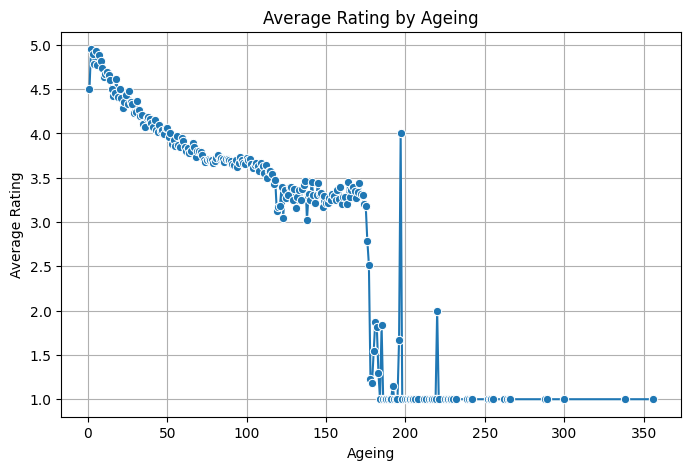

In [72]:
# Lets deep dive into the Age features reading

# Group by year and calculate mean rating
yearly_ratings = train.groupby('ageing')['rating_engineTransmission'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.lineplot(x='ageing', y='rating_engineTransmission', data=yearly_ratings, marker='o')

plt.title('Average Rating by Ageing')
plt.xlabel('Ageing')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Observations:
* This is very important feature as the trend is very clear that if the ageing is high or more than 160 months then rating drops significantly

In [51]:
non_categorical_feature_selection = ['inspectionStartTime', 'year', 'odometer_reading', 'ageing']

<h2>4.3 Handling Missing Values</h2>

In [52]:
print('Total Features with missing values: ',  train.isna().sum()[train.isna().sum()>0].shape[0])
fig = px.bar(x = train.isna().sum()[train.isna().sum()>0].index.str.replace('engineTransmission_', '')
            , y = train.isna().sum()[train.isna().sum()>0].values
            , template= 'plotly_dark'
            , color= train.isna().sum()[train.isna().sum()>0].values
        )
fig.update_traces(text = train.isna().sum()[train.isna().sum()>0].values)
fig.update_layout(
        xaxis_title="Features"
        , yaxis_title="# Missing Data Points"
        , coloraxis_showscale=False
)

Total Features with missing values:  54


<b> Key Points </b>
- From the dataset we have multiple features (54) with null entries. 
- We are already familiar of these null values, are because of their parent features condition is okay.
- Even for comments section we have observed that all are related to issues.
So, wherever we have Nan values we can impute these null values either - 'Normal' or 'No issues' 

In [53]:
# Imputing NaN with 'Normal'
train.fillna('Normal', inplace= True)
print(train.isna().sum()[train.isna().sum()>0])

Series([], dtype: int64)


<h3>4.3.1 Detecting Outliers</h3>

In [63]:
def z_score(col):
    # Calculate mean and standard deviation
    mean = train[col].mean()
    std_dev = train[col].std()

    # Calculate Z-scores
    train['Z_score'] = (train[col] - mean) / std_dev

    # Define threshold
    threshold = 3

    # Identify outliers
    outliers = train[(train['Z_score'] > threshold) | (train['Z_score'] < -threshold)]

    return outliers

<Axes: xlabel='odometer_reading', ylabel='rating_engineTransmission'>

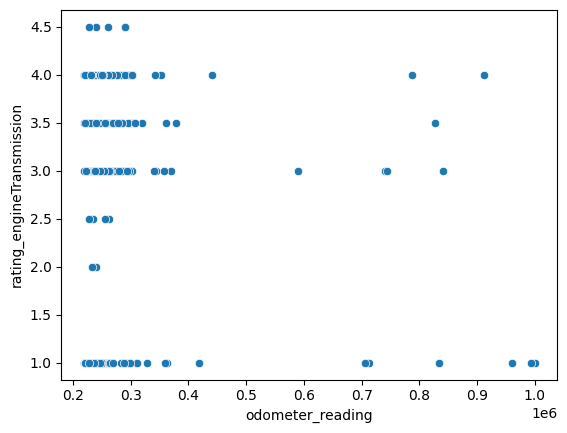

In [65]:
# 1. Numerical data (odometer)
odometer_outliers = z_score('odometer_reading')

sns.scatterplot(x = 'odometer_reading', y = 'rating_engineTransmission', data=odometer_outliers)

<b>Observation:</b>
* Even if the odometer readings are high we have rating above 3 

<Axes: xlabel='ageing', ylabel='rating_engineTransmission'>

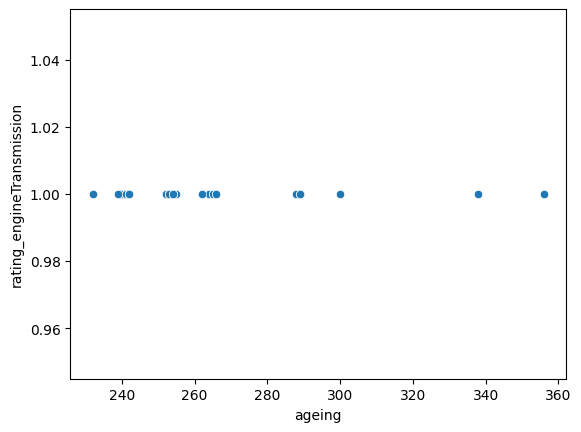

In [73]:
# 1. Numerical data (odometer)
ageing_outliers = z_score('ageing')

sns.scatterplot(x = 'ageing', y = 'rating_engineTransmission', data=ageing_outliers)
plt.

<h2>4.4 Feature Selection</h2>


- After performing EDA now we have got to know which features can give more information and is useful for model training


In [54]:
# We already have list of all the features selected
print(parent_features_selection)
print(child_feature_selection)
print(other_features_selection)
print(non_categorical_cols)


['engineTransmission_battery_value', 'engineTransmission_engineoilLevelDipstick_value', 'engineTransmission_engineOil', 'engineTransmission_engine_value', 'engineTransmission_exhaustSmoke_value', 'engineTransmission_engineBlowByBackCompression_value']
['engineTransmission_battery_cc_value_0', 'engineTransmission_battery_cc_value_1', 'engineTransmission_engineOil_cc_value_0', 'engineTransmission_engine_cc_value_0', 'engineTransmission_engine_cc_value_2', 'engineTransmission_engine_cc_value_3', 'engineTransmission_exhaustSmoke_cc_value_0', 'engineTransmission_engineBlowByBackCompression_cc_value_0']
['fuel_type', 'engineTransmission_comments_value_0', 'engineTransmission_comments_value_1']
['inspectionStartTime', 'year', 'month', 'engineTransmission_engineOil_cc_value_9', 'engineTransmission_engine_cc_value_10', 'odometer_reading', 'rating_engineTransmission']


In [55]:
features_selection = list(non_categorical_feature_selection) + list(parent_features_selection) + list(child_feature_selection) + list(other_features_selection) + ['rating_engineTransmission']
final_train = train[features_selection]
print(final_train.shape)

(21045, 22)


In [56]:
# Saving the feature selected to CSV for model training
final_train.to_csv('final_train.csv', index = False)
# Also saving Raw test data
test.to_csv('test.csv', index = False)